# Name :- Varun Biren Majithia
# Student ID :- 8894799

## Importing the necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,precision_recall_curve,precision_score,accuracy_score,confusion_matrix,f1_score,recall_score

## Importing the data to jupyter environment

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking the info of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Checking the five summary statistics

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Checking for null values

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Checking the class counts of the dependent features

In [6]:
class_counts = df['Class'].value_counts()
class_counts

Class
0    284315
1       492
Name: count, dtype: int64

## Visualizing the dependent class (distribution)

<Axes: xlabel='Class', ylabel='count'>

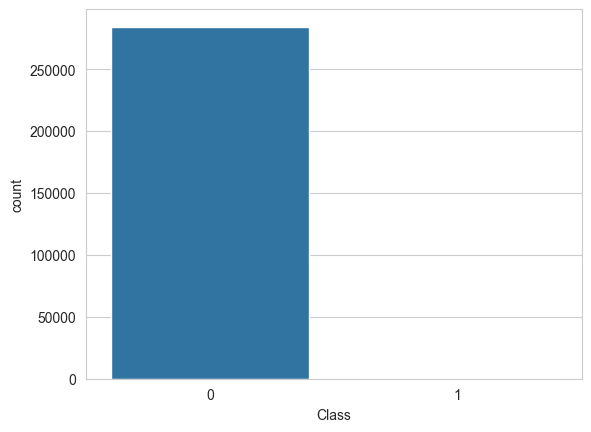

In [7]:
sns.set_style("whitegrid")
sns.countplot(x = "Class",data = df)

## My inferences on the above imbalanced distribution of the dependent class

#### For our model to learn the patterns accurately across the labels, it is essential to have a balanced dataset. A balanced training set means that the quantity of number of samples in each class is roughly equal and it is not heavily skewed. It help the model to prevent bias. When the train data is imbalanced the model may be biased towards a particular class since it has more number of data of that particular class. Moreover, a balanced train set will enable the model to get accurate prediction by having better decsion boundaries leading to a fair and robust model with good generalization to unseen data. In our data the dependent set is completely imbalanced and over 99% of the data accounts for one class "0: and less than 1% of the data accounts for label "1". 

In [8]:
all_num_features = df.drop(columns=['Class']).columns

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Correlation of each variable over the dependent feature

In [10]:
df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']].corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

## Visualizing the distribution of all the variables using histogram

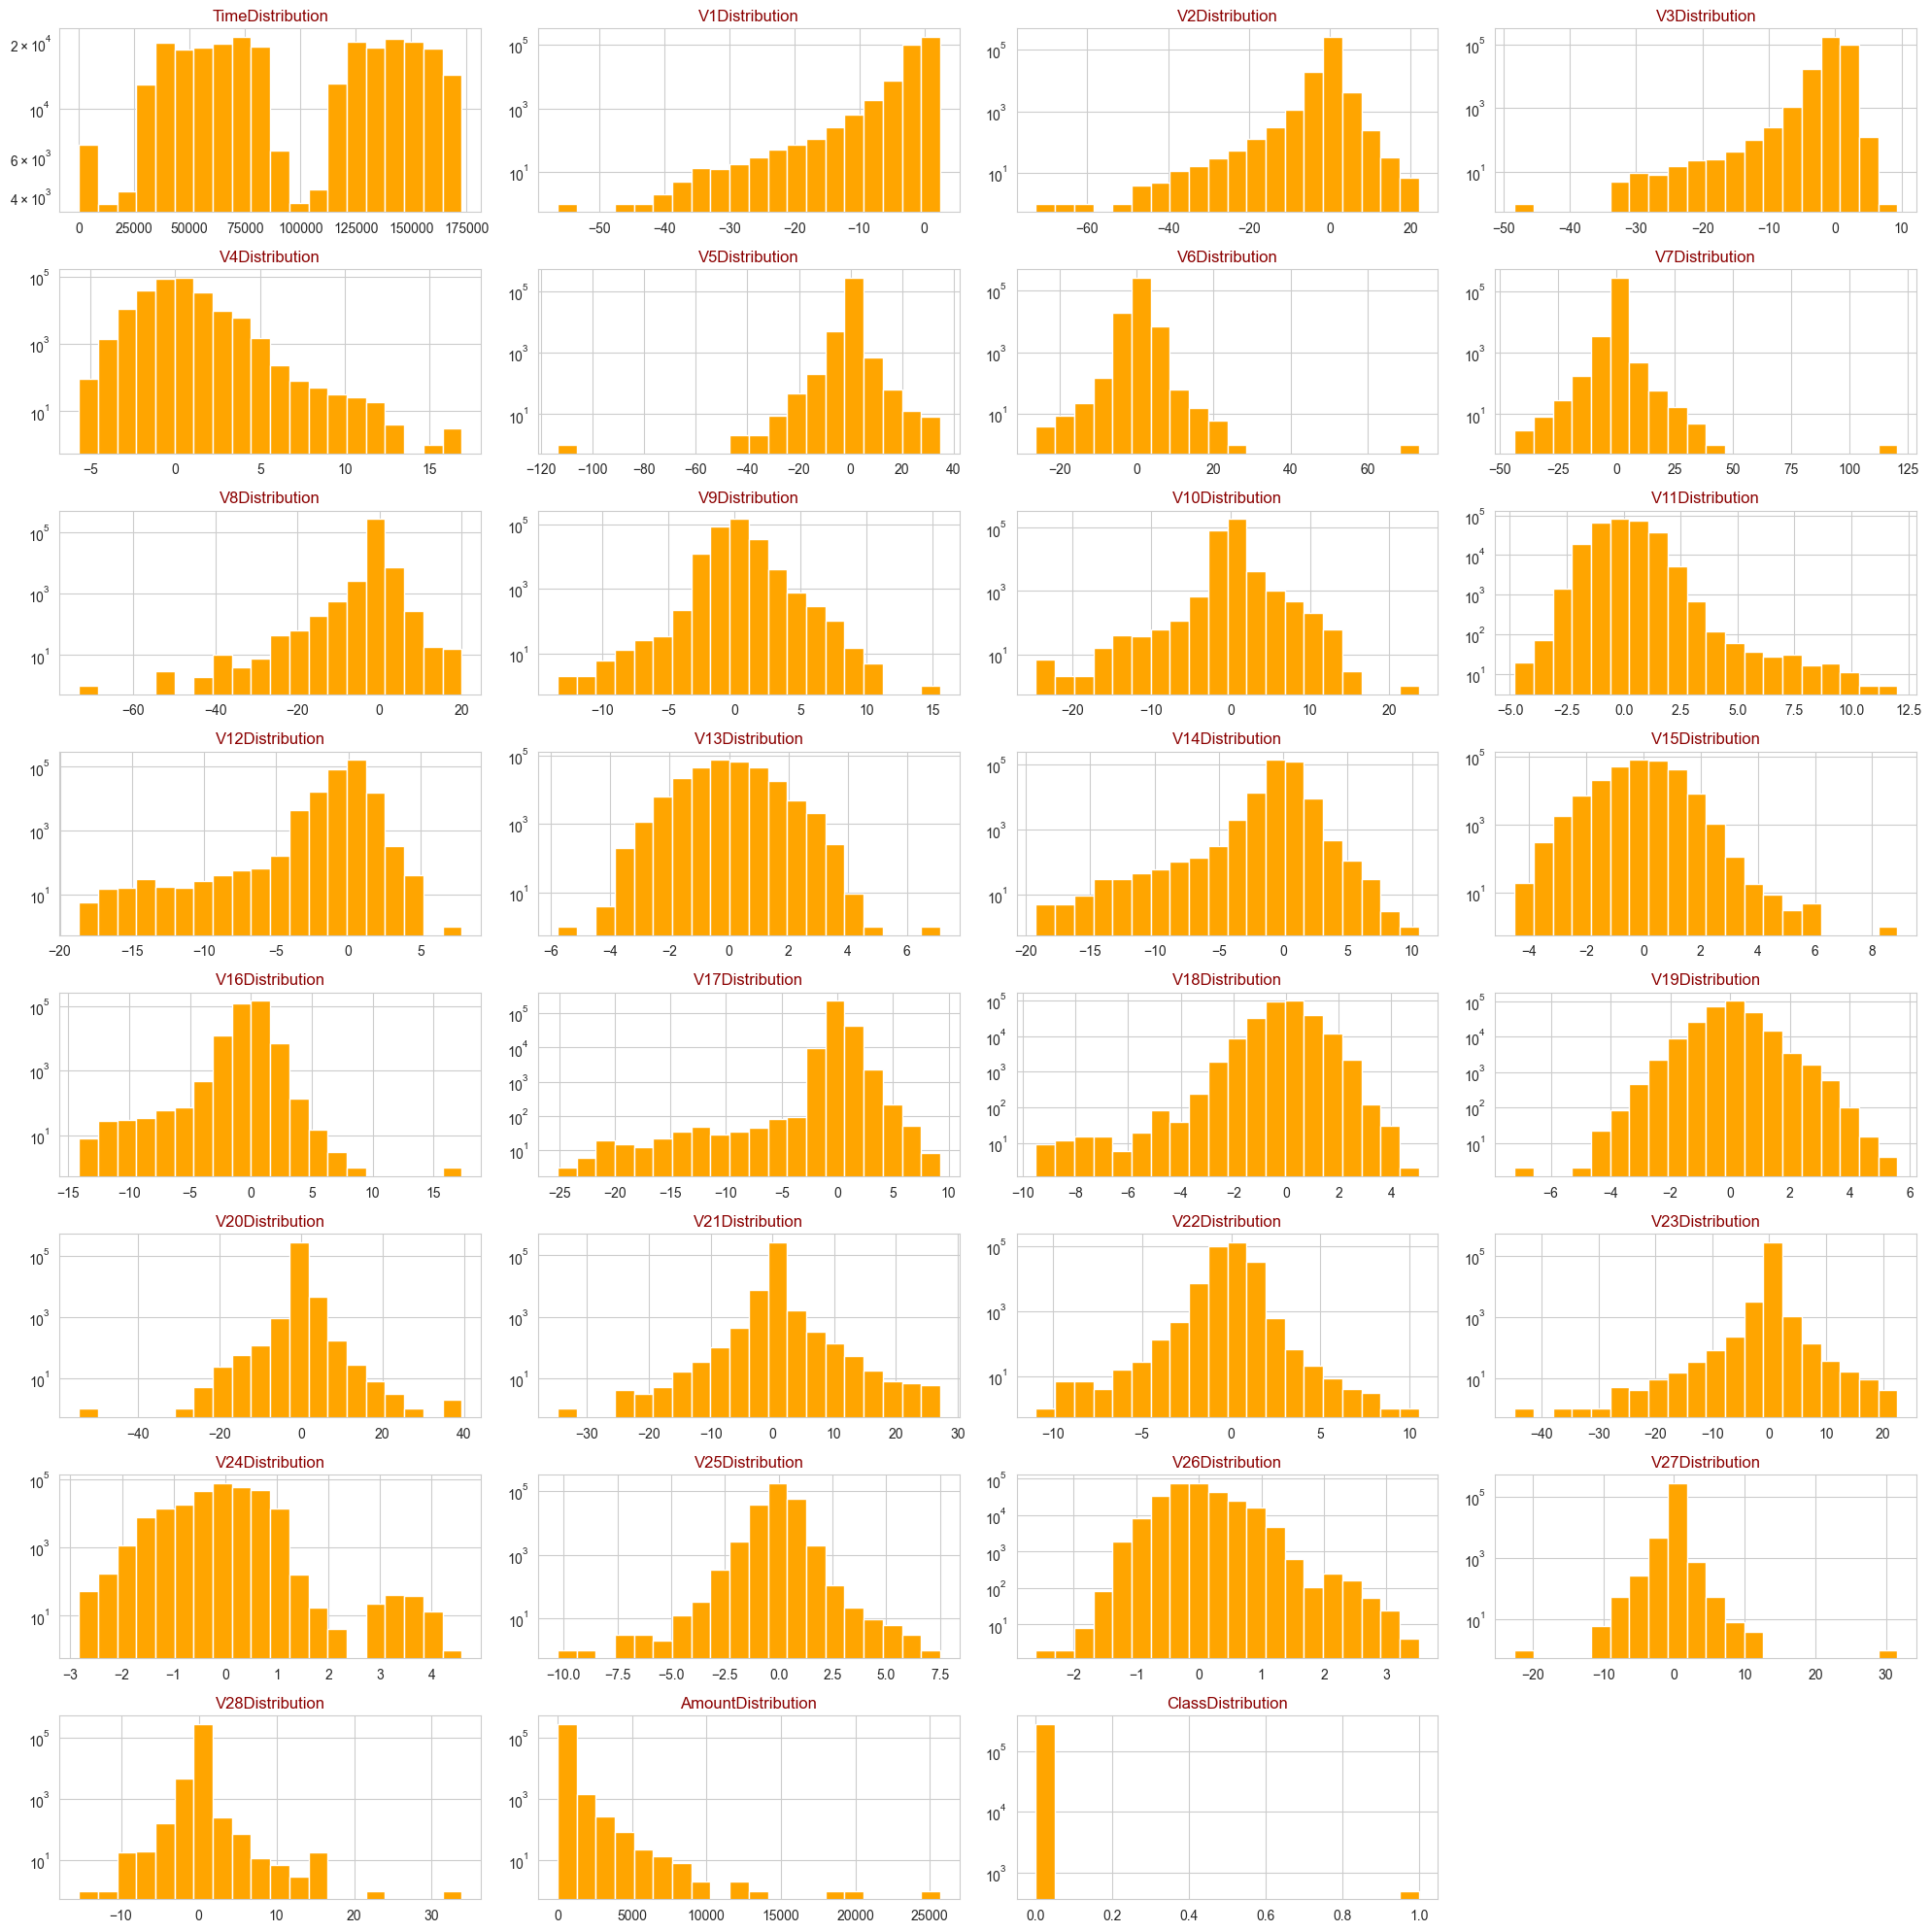

In [11]:
def histograms(df,variables,rows,col):
    fig = plt.figure(figsize =(20,20))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(rows,col,i+1)
        df[var].hist(bins = 20,ax=ax,facecolor="orange")
        ax.set_title(var+"Distribution",color = "DarkRed")
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
histograms(df,df.columns,8,4)

### Creating a variables "legit_trans" and "fraud_trans" consisting of Labels

In [12]:
legit_trans = df[df.Class==0]
fraud_trans = df[df.Class==1]

### Creating a random sample of 492 samples consisting the legit transactions to balance the dataset 

In [13]:
legit_sample = legit_trans.sample(n=492)

### Creating a new_df consisting of equally distributed class labels (Undersampling)

In [14]:
new_df = pd.concat([legit_sample,fraud_trans],axis = 0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213576,139309.0,-1.764110,2.042562,-3.317093,-0.499526,1.217073,1.292592,-0.213723,-4.449180,0.241343,...,5.042025,0.506745,0.918619,-0.590440,-1.030150,-0.265612,0.809323,0.251836,86.00,0
41989,40909.0,-0.628743,1.224911,1.048914,-0.239425,0.409546,-0.000385,0.553480,0.218941,-0.506362,...,-0.232967,-0.512169,-0.034479,-0.352106,-0.155385,0.107899,0.369781,0.140467,6.54,0
147931,89172.0,-1.414505,-0.835980,-0.223060,0.429768,-0.142418,-0.983703,0.701614,0.061062,0.732925,...,-0.304955,-0.360195,1.609657,-0.159899,-0.762775,-0.697460,0.006039,-0.354969,203.70,0
238500,149695.0,1.961105,-0.303180,-0.525783,1.031985,-0.252044,0.353342,-0.764275,0.300843,0.924706,...,0.222452,0.652683,0.140334,0.285813,-0.107004,-0.585535,0.037301,-0.041356,1.00,0
75173,55937.0,-2.854272,0.360248,0.741220,0.429652,-0.178468,-0.877957,-0.197604,0.813229,-0.380045,...,-0.187873,0.017777,0.885661,0.573338,0.302287,0.232865,-0.050362,0.345183,19.96,0


### Ensuring equal distribution of samples  (Undersampling)

In [15]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

## Reasons to choose Undersampling for treatment:- class imabalance

#### Undersampling reduces the size of the majority class. Moreover, undersampling allows is to preserve the originality of the data, on the other hand inbuilt oversampling libraries can generate synthtetics data which can introduce artificial pattern which may not align with the originality of the data. It also helps to preserve the original distribution of the data. 

### Visualizing the dependent feature after Undersampling

<Axes: xlabel='Class', ylabel='count'>

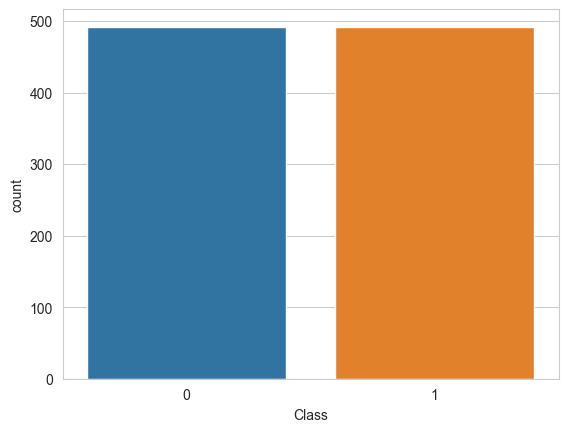

In [16]:
sns.set_style("whitegrid")
sns.countplot(x = "Class",data = new_df)

### Splitting into train and test data

In [17]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

### Feature scaling (Standardization)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_standardized = sc.fit_transform(X)

## Reasons to choose Standardization for this data

#### Algorithms such as logistic regression are sensetive to the scale of the features. With the standard scaler it will scale the values to have a mean of 0 and standard deviation of 1. Standard scaler ensures that all the features are on similar scale. As compared to other scaling methods standard scaler is very robust to the outliers. Standardization preserves the interpratibility of the features 

### Splitting into train and test data 

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_standardized,y,test_size=0.3,stratify=y)

## Fitting Logistic Regression on training data

In [20]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)

LogisticRegression()

## Making predictions on test data

In [21]:
y_pred = model_1.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Finding out the probability of model to predict class "0" and class "1" on test data

In [23]:
y_probs = model_1.predict_proba(X_test)
y_probs[:10]

array([[9.86992627e-01, 1.30073726e-02],
       [9.23465000e-01, 7.65349996e-02],
       [9.36348456e-01, 6.36515443e-02],
       [6.16190170e-06, 9.99993838e-01],
       [7.85218019e-01, 2.14781981e-01],
       [8.36890085e-01, 1.63109915e-01],
       [9.65073141e-01, 3.49268592e-02],
       [2.61501931e-11, 1.00000000e+00],
       [5.58683353e-01, 4.41316647e-01],
       [9.59082088e-01, 4.09179117e-02]])

## Trying to understanding the model predictibility on test data seen in the above output 

#### row 1 suggests that the model assigns a probability of approximately 98.6% to class 0 and a probability of approximately 1.3% to class 1

#### row 2 suggests that the model assigns a probability of approximately 92.3% to class 0 and a probability of approximately 7.65% to class 1

#### row 3 suggests that the model assigns a probability of approximately 93.6% to class 0 and a probability of approximately 6.36% to class 1

#### row 4 suggests that the model assigns a probability of approximately 0.6% to class 0 and a probability of approximately 99% to class 1

## Indexing the positive class predictions

In [24]:
y_probs_positive = y_probs[:,1]

## Indexing the positive class predictions

In [25]:
y_probs_negative = y_probs[:,0]

## Calculating false_positve_rate, true_positive_rate

In [26]:
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_probs_positive) 

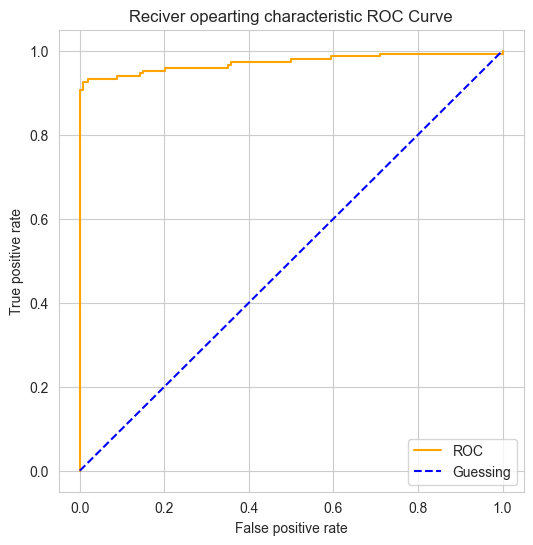

In [46]:
# create a fucntion for ROC curve
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6,6]
def auc_roc_curve(false_positive_rate,true_positive_rate):
    """
    Plots a ROC given the false positive rate fpr and a true positive rate tpr of a model"""
    plt.plot(false_positive_rate,true_positive_rate,color = "orange",label = "ROC")
    plt.plot([0,1],[0,1],color = "blue",linestyle ="--",label = "Guessing")
    
    # cusotmize the plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Reciver opearting characteristic ROC Curve")
    plt.legend()
    plt.show()
auc_roc_curve(false_positive_rate,true_positive_rate)

## Performing Cross Validation on 10 folds with accuracy as a scoring parameter

In [28]:
scores = cross_val_score(model_1, X_train, y_train, cv=10, scoring='accuracy')
scores

array([0.89855072, 0.98550725, 0.92753623, 0.97101449, 0.95652174,
       0.97101449, 0.91304348, 0.92753623, 0.94117647, 0.98529412])

## Interpreting the cross validation results

#### From the above results we can see that the overall performance of the model is good over all the 10 folds, only we can see that it has fallen a bit on the first fold. But overall, the model has good generalization abilities. The variances of the accuraies of all the 10 folds  is very low and the range specifically lies between 89% to 98.5% indiacates that the model is consistently performing well across all the subsets. From these results we can say that the model is performing well on predicting unseeen data.

## Mean accuracy of model on 10 folds

In [45]:
print("The mean cross validation accuracy of the model is",scores.mean())

The mean cross validation accuracy of the model is 0.9477195225916454


#### The mean scores of CV helps us to understand the unbiased estimate of out model's performance. As each fold of the cv is a result of a different subset of the data, taking mean will allow to interpret the results that are not biased towards a specific split. As it shows the overall performance it helps us to understand the generalization capabilities of the model to predict unseen data.

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.956081081081081


## Classification Report

In [31]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.956081081081081
Precision: 0.9927007299270073
Recall: 0.918918918918919
F1 Score: 0.9543859649122808


## Interpreting Accuracy, Precision, Recall and F1 Score

#### Accuarcy of 95.6% indicates that the model has correctly predicted around 95.6% of the total samples of the test data

#### Precsision is the measure of true positive predictions out of all positive prediction.Precision of approximately 99.3% means that out of all transactions model has correctly classified (1) correctly 99.3% of times. Which means that if the model predicts a transaction to be fradulent, with this precision we say that there are high chances for it to be a fradulent transaction.

#### Recall is measure of true positive predictions out of all positive class samples present in the data. Recall of 91.9% means that the model has correctly classified 91.9% has out of all actual fraudulent transactions present in the test data, the model correctly identified around 91.9% of them

#### F1 score is harmonic mean of precision of and recall. A high F1 Score of 95.4% indicates a good trade off between correctly identifying positive class instances and minimizing false positives

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       148
           1       0.99      0.92      0.95       148

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



# Part B

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,precision_recall_curve,precision_score,accuracy_score,confusion_matrix,f1_score,recall_score,mean_squared_error, mean_absolute_error, r2_score

## Loading the dataset to jupyter environment

In [2]:
df2 = pd.read_csv("insurance.csv")
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Checking the shape of the data

### The insurance data consists of 1338 rows and 7 columns

In [3]:
df2.shape

(1338, 7)

### Info of the dataset

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Five summary statistics of the dataset

In [5]:
df2.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking for null values in the dataset

In [6]:
df2.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Checking the distribution of column "Age"

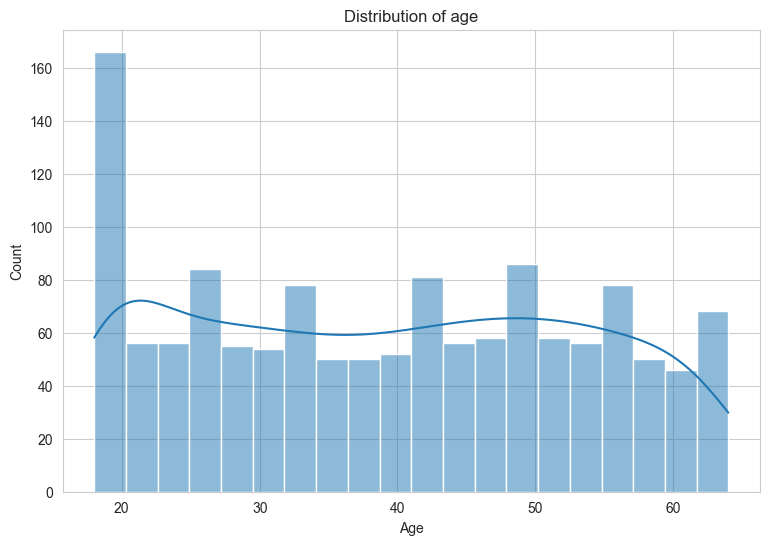

In [7]:
plt.rcParams['figure.figsize'] = [9,6]
sns.set_style("whitegrid")
sns.histplot(df2['age'],kde=True,bins=20)
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Checking the distribution of "BMI"

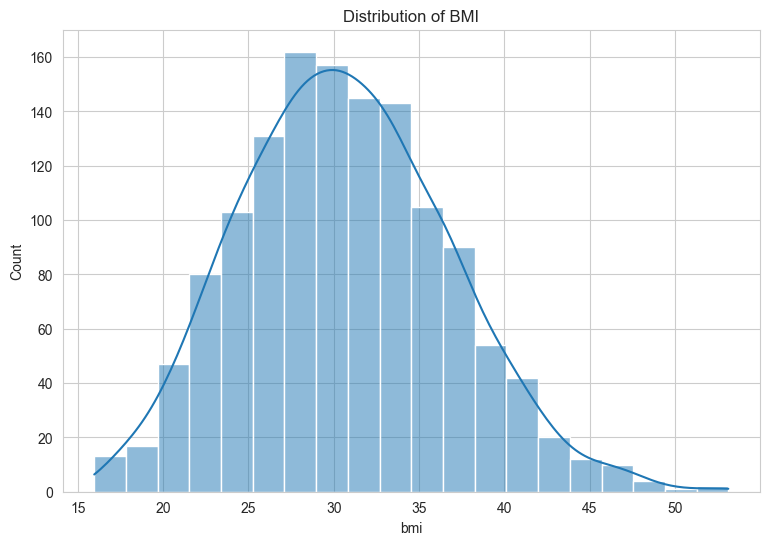

In [8]:
sns.histplot(df2['bmi'],kde=True,bins=20)
plt.title("Distribution of BMI")
plt.xlabel("bmi")
plt.ylabel("Count")
plt.show()

#### From the above visualization we can see that BMI follows a normal distribution

### Visualizing the Charges ("Independent Variable") with respect to categorical feature "Smoker"

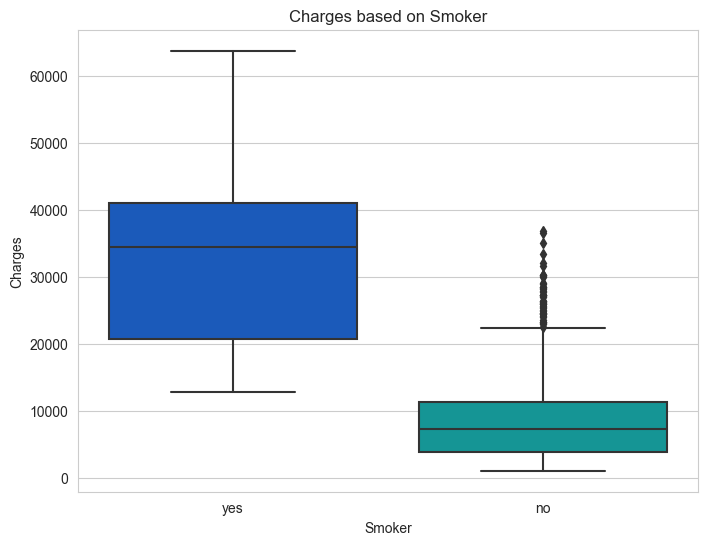

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df2,palette="winter")
plt.title('Charges based on Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

##### From the above plot we can see that the people who smoke have high insurance charges. The median insurance for smoker is approximately 35000. And The median insurance for people who dont smoke is aprroximately 5000

## Count plot of age

<Axes: xlabel='sex', ylabel='count'>

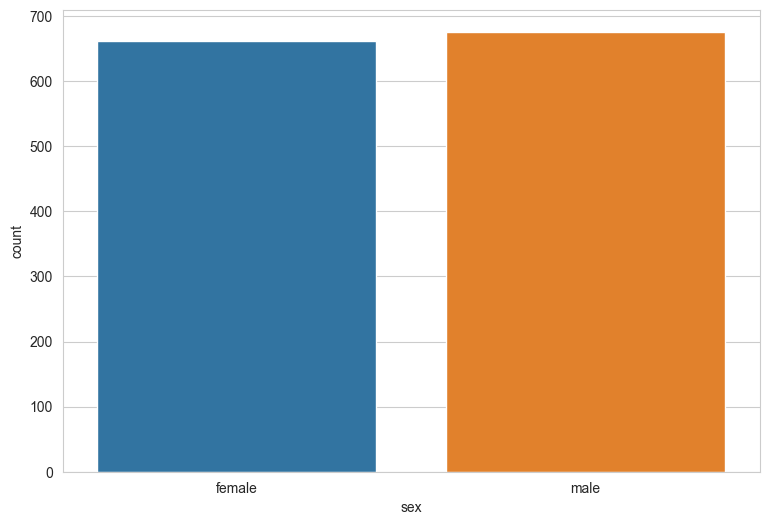

In [10]:
sns.set_style("whitegrid")
sns.countplot(x = "sex",data = df2)

##### From the above count plot we can visualize and interpret that the we have equal amount of data for both males and females

In [11]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### From the above dataframe we can see that the that there are three string "categorical features" in our data namely "sex". "children", "smoker", and "region" and for our model to understand patterns and process the data the data has to be numerical. So, in the step below I have converted the categorical "string" variables to catrgorical "numerical" variables using Label Encoder.

## Label Encoder 

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2["sex"] = encoder.fit_transform(df2["sex"])
df2['smoker'] = encoder.fit_transform(df2["smoker"])
df2["region"] = encoder.fit_transform(df2["region"])

In [13]:
df2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Correlation Matrix

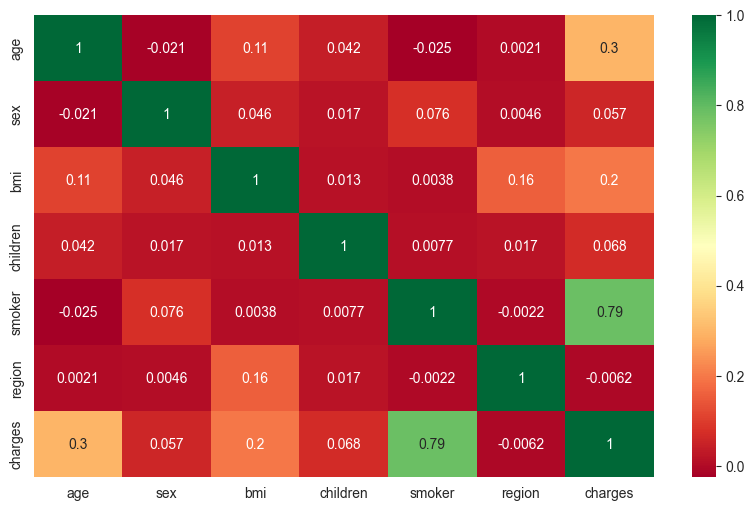

In [15]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [10,6]
sns.heatmap(df2[top_corr_features].corr(),annot = True,cmap = 'RdYlGn')
plt.show()

## Checking correaltion of all the independent variables with dependent variable

In [16]:
df2[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

#### From the above results we can see that Variable "smoker" has a strong positive correaltion with "charges" follwed by "age", "bmi", "children", "sex". 

#### Variable "region" has weak negative correaltion with "charges".

In [17]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### Reasons to choose standization

#### Standardization does not assume any specific assumptions of the data. Standarization preserves the originality of the data. It preserves the data on the same scale and ensures all the variables have mean as "0" and standard deviation of "1". 


## Setting random seed as 4799

In [19]:
random_seed = 4799

## Performing train test split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=random_seed)

## Fitting the model on train data

In [21]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_train,y_train)

LinearRegression()

## Making predictions on the test data

In [22]:
y_pred = model_2.predict(X_test)

## Evluating the model using Cross Validation on 10 folds using Rsquared as a scoring metric

In [23]:
scores2 = cross_val_score(model_2,X_train,y_train,cv=10,scoring = "r2")
scores2

array([0.6455168 , 0.73384329, 0.68432141, 0.66446163, 0.68504258,
       0.77715209, 0.84518211, 0.69212237, 0.75233153, 0.84310975])

In [27]:
print("The average Rsquared value of the model on 10 folds is", scores2.mean())

The average Rsquared value of the model on 10 folds is 0.7323083560156376


## My Inferences on the above results of cross validation

#### The R2 scores range from approximately 0.6455 to 0.8452, indicating that the model's predictions explain between approximately 64.55% to 84.52% of the variance in the target variable. 

#### Moreover, The highest R squared is 0.8452 suggesting the model is capable of explaining the 84.52% variance in the dependent feature 

#### Overall, we can see that the the average Rsquared value of the model is 73.23% suggesting that model is performing well and has good generalization abilities

## Evaluating the model using Rsquared, Mean squared error, and Mean absolute error

In [24]:
print("Check for Regression metrics on the train set")
print(f"R2 Score:{r2_score(y_test,y_pred)}")
print(f"MAE:{mean_absolute_error(y_test,y_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_pred)}")

Check for Regression metrics on the train set
R2 Score:0.7566816034973085
MAE:4163.722860436099
MSE:34631509.44992275


## My inferences on the above evaluation results of the model

#### Mean absolute error is the average absolute difference between the predicted and actual values. In the model the MAE is 4163.7 indicating that model's predictions deviate by approximately 4163.72 units (charges) from the true target variable

#### Mean squared error is the average squared difference between the predicted values and the true target values. In our model the MSE is 34631509.44992275, indicates that, on average, the squared differences between the predicted and true values is approximately 34631509.45.